In [1]:
#| echo: false
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score, \
recall_score, precision_score, confusion_matrix, mean_absolute_error, f1_score, cohen_kappa_score, matthews_corrcoef, classification_report
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,BaggingRegressor,BaggingClassifier, \
AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from pyearth import Earth
import itertools as it
import time as time
import xgboost as xgb
import re 

In [32]:
#| echo: false

# Load in the original dataset for white wine
df = pd.read_csv('winequality-white.csv', sep=';')

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

Wine quality is a large part of the culinary scene of different countries all around the world. The art of making wine is exercised in many different parts of the world, yet, there is no standardized manner to rate the quality of wine.

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. 

Since the quality of a wine is often determined by human tasters, and human taste is very subjective, the quality grade assigned to a specific wine might differ greatly between tasters. This makes it difficult for sommeliers and wine enthusiasts to know which wines to serve and/or purchase. Therefore, the goal of this project is to help address this problem by developing a machine learning model that can predict the quality of white wines based on their objective physicochemical properties, rather than subjective human taste.

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

The dataset is obtained from the UCI Machine Learning Repository, and it contains information about various physicochemical properties of white wines and their corresponding quality ratings based on wine samples from northern Portugal. We will be predicting the quality of the wine based on the other predictors. We will predict the quality of wine of a test set by training a model, so that we can use the predictor variables to predict the quality of wine. The dataset can be found at this link: https://archive.ics.uci.edu/ml/datasets/Wine+Quality (the exact datafile is found at "Data Folder" > "winequality-white.csv".

The whole dataset contains 4,898 observations, with 11 continuous predictors and no categorical predictors. The predictors are different physicochemical properties of white wines: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, and alcohol. The response variable-- the quality of white wine-- is classified from a scale of 0 to 10 (0 being the lowest quality, and 10 being the highest quality).

The dataset will help solve our problem by providing us data from which we can train a model to predict the quality of wine based on its objective properties, rather than relying on the subjectivity of human taste.

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

Sensory analysis is an important part of the wine certification process, and as it is performed by human tasters, it is largely subjective, so it could be a powerful tool for winemakers to be able to predict the quality of their wine based on physicochemical properties, without relying on an outside taster and with a concrete basis for evaluation. They could adjust offerings accordingly to increase profit. Sommeliers in training would also benefit from this model to test the quality of their assessments and advance in their careers. Wine enthusiasts and casual wine drinkers could make more informed decisions about which wine to purchase since they would gain a better sense of what makes a good wine. 

## Data quality check / cleaning / preparation 

Show the distribution of the response here. Report the standard deviation and mean in case of a regression problem, and proportion of 0s and 1s in case of classification.

For all other content, as mentioned below, just provide the highlights *(if any)* and put the details in the appendix.

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation. Its ok if there were none.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? Were there missing values? How did you handle them? Its ok if the data was already clean.

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your model(s).

The proportion of each class of the response are as follows:

In [33]:
#| echo: false
print(df.quality.value_counts(normalize = True))

6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64


Based on this distribution, we identify and recognize that some qualities of wine (specifically, those of quality 0, 1, 2, and 10) are not represented in the dataset. Therefore, we can only develop a model that predicts the quality of wine on a scale from 3-9. Furthermore, we also notice that the proportion of the classes are unbalanced in the dataset. Classes on the lower (3 and 4) or higher (8 and 9) are under represented, which classes in the middle (5, 6, and 7) are overrepresented. We should account for this imbalance in our model development to ensure that we can predict each class accurately.

The distribution of values of each variable used in the analysis demostrate that the ranges of the values of each predictor vary greately. For example, the range for fixed acidity goes from 3.8-14.2, but the range for chlorides only ranges from 0.009 to 0.346. This was a useful insight that helped us realize that we would need to standardize our data in the data cleaning/preparation process in order to account for the different magnitudes of the predictors and limit the influence of magnitudes on the model's prediction ability.

Our data was already clean, as there were no missing values and all of the data was of a float type, which made it conducive to our modeling.

In order to prepare our data for model development, we standardized our data to account for the large differences in magnitudes between the predictors. Furthermore, when splitting our data into a train and test set, we stratified the data according the response variable (quality). This allowed us to account for the imbalance in the classes within the dataset and ensure that the training and testing sets have similar distributions of the target variable, which can lead to more accurate and reliable model performance estimates. 

## Exploratory data analysis

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

The primary EDA that was helpful in model development was visualizing the distribution of the response (quality):

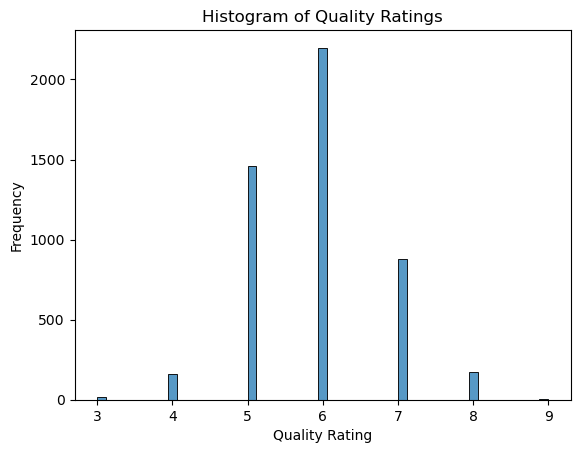

<Figure size 100x100 with 0 Axes>

In [17]:
#| echo: false
sns.histplot(data=df, x='quality')
plt.title('Histogram of Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Frequency')
plt.figure(figsize=(1,1))
plt.show()

**Insights:**
1. Normal distribution, with the highest number of wine in the category of 6. May be problematic as data will less accurately be able to predict variables that are in categories other than 6.
2. F1 score will be a good metric to tune according to because it is good for imbalanced datasets, where one class is more dominant than the other. Accuracy alone may be misleading because the model could achieve high accuracy by simply predicting the dominant class. The F1 score considers both true positives and false negatives, giving a more accurate evaluation of the model's performance in such scenarios.

Although we did additional EDA, the tree-based nature of the models we chose meant that the insights identified from the EDA were not relevant to our model development. For example, since decision trees are robust to the precense of outliers and are unaffected by the transformation of predictors, our insights from further EDA were not insightful. Furthermore, although we did look at the correlation to identify a predictor or predictors that were strongly correlated with the response, we found no such evidence.

## Approach

What kind of a models did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction accuracy or your chosen metric?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

We used a decision tree model, a bagged decision tree model, a random forest model, a boosting (XGBoost) model, and a logistic regression model to create our final ensembled model. While we mainly tuned tree-based models (the first four models), we also decided to include a logistic regression model in our final ensembled model to help decorrelate the predictions and increase the accuracy of our model. Since this is a multi-classification problem, we focused on accuracy precision, recall, and F1-score. While accuracy gave us a general measure of how often our models were correct during the tuning process, we considered it holistically along with recall, precision, and F1-score since the class imbalance in our dataset may lead us to achieve high accuracy by simply predicting the dominant class. 

During the tuning process, we scored according to F1-score, since it is a single metric that balances both precision and recall. We wanted to maximize precision because we want to minimize the number of false positives; we would not want to misclassify a wine as either low or high quality if it is not. we also want to maximize recall because we want to maximize the number of true positives; we want our model to be used to help clarify and confirm the quality of a wine based on its physiochemical properties. Given the tradeoff between precision and recall, we wanted to maximize F1-score since it maximizes the two competing objectives. Furthermore, since F1-score is much more senstive to data distrbution, it is a suitable metric to which models can be optimized when trained on imbalanced dataset.

We anticipated that the class imbalance in our dataset would be an issue in our model's prediction ability, causing the F1-score of our model to suffer. This proved to be a problem in our model development, as our final model performed fairly well for the most commonly represented classes, but poorly for the least represented classes. Despite our attempts to fix the class imbalance through undersampling and oversampling (through SMOTE), our results could not be improved due to the nature of the dataset.

In terms of prior solutions, there is one paper that has been published, https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub, in which they performed simultaneous variable and model selection for neural network and support vector machine techniques. The highest model accuracy achieved in the existing solutions is by using SVM with a classification approach — 64.6% for the correct classified class of white wine, with a 86.8% accuracy rate for predicting within one of the two nearest classes. We took a different approach that this paper since we did not do variable selection and we chose our models through intuition about which models would be best for a multiclass classification problem. Our model is slightly better in terms of accuracy; we attained an (F1-score) accuracy of 67.6%, compared to the papers 64.6%.

## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### Decision Tree
*By Aarti Pappu*

I considered the hyperparameters `criterion`, `max_depth`, `min_samples_split`, `max_leaf_nodes`, `max_features`, and `min_samples_leaf`. Previous experience tuning decision trees gave me intuition that tuning these hyperparemeters would help to make an specific model that was well-fit to make predictions based on the data while also preventing the model from overfitting to the train data. I chose the maximum value of `max_depth` and `max_leaf_nodes` based on the maximum values of the base model with no tuning, and I chose the maximum value of `max_features` based on the total number of predictors in the dataset (11). I chose to also tune the values of `min_samples_split` and `min_samples_leaf` to prevent the model from overfitting. Lastly, I tuned `criterion` to see if one criterion of building the tree was more advantageous than the other. My hyperparameter grid was:

In [ ]:
param_grid = {'criterion':['gini','entropy'],
              'max_depth': range(2,26,5),
              'max_leaf_nodes': range(2,1038,100),
              'max_features': range(1, 12,3),
              'min_samples_leaf': range(1,10,2),
              'min_samples_split': range(2,10,2)}

I plotted the results of this initial grid search to identify the values (or ranges of values) for which the F1-score was optimized. Through the plots, it was clear that the optimal values of `min_samples_leaf` and `min_samples_split` were their default values (1 and 2 respectively), so I did not need to further tune those. However, since there were no clear optimal values for the remaining parameters, I completed another grid search to tune the remaining hyperparameters. 

I again plotted the results of this second grid search. I noticed that the Gini `criterion` yielded a slightly higher F1-score than the entropy `criterion`, so I did not further tune the `criterion` hyperparameter. I then did a third grid search using a narrowed range of `max_features`, `max_depth`, and `max_leaf_nodes`, considering more values within the smaller ranges. After three rounds of grid search, I found my optimal hyperparameters: `max_depth`=17, `max_features` = 4, `max_leaf_nodes`=613, `criterion` = 'gini', `min_samples_leaf` = 1, and `min_samples_split` = 2. However, the performance of this tuned model was worse on the test data compared to the base model. As such, I decided to revert back to using the base model as a means to tune the hyperparameters. I started tuning sequentially, adding and changing the hyperparameters one at a time. My optimal model ended up just being the base model, only with the `criterion` of entropy rather than Gini. As such my optimal hyperparameter was `criterion` = 'entropy'.

In [ ]:
best_params = {'criterion': ['entropy']}

### Bagged Decision Trees
*By Divya Bhardwaj*

The grid of hyperparameter values over which the initial search was done included varying values for `max_samples`, `max_features`, `bootstrap`, and `bootstrap_features`. As it was a bagging model, the number of trees was increased to a high enough amount once finding the optimal values for the other hyperparameters. 

In [ ]:
params = {'base_estimator': [DecisionTreeClassifier(random_state = 1)],
          'n_estimators': [300],
          'max_samples': [0.5, 0.75, 1.0],
          'max_features': [0.5, 0.75, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

After obtaining the initial results, other three gridsearches were done to fine-tune the values of `max_samples` and `max_features`, based on plots of the K-fold f1 score and `max_samples` and `max_features` values, respectively, as well as the classification report and f1 score of the model with the found optimal hyperparameter values. Also, once the range of `max_samples` and `max_features` was narrowed down by proportions, I switched to utilizing the actual values in the gridsearch for more accurate fine-tuning. This was the final grid search, to refine the number of samples once the other hyperparameters' optimal values had been found through previous gridsearches:

In [ ]:
params = {'base_estimator': [DecisionTreeClassifier(random_state = 1)],
          'n_estimators': [300],
          'max_samples': [2400, 2500, 2600],
          'max_features': [7],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

Then, the number of trees was increased manually to an optimally high value in terms of the f1 score (which is usually better in the case of uneven class distribution due to how it balances precision and recall on the positive class) to find the overall optimal bagging model. The best parameters ended up being: `bootstrap` = False, `bootstrap_features` = False, `max_features` = 7, `max_samples` = 2500, and `n_estimators` = 650. 

### Random Forest
*By Diego Schummer*

In the parameter grid, I've added `class_weight` to handle the class imbalance. It adjusts the cost function to give more weight to under-represented classes and less weight to over-represented ones. 'balanced' and 'balanced_subsample' automatically adjust weights inversely proportional to class frequencies. The 'None' option is added to compare the performance with and without class weighting.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'class_weight' : ['balanced', 'balanced_subsample', None]
}

After running the initial search and creating the model with the best params, looking at the feature importance and classification result led to a few observations: 
1. Class 6: Similar to class 5, the precision and recall are around 0.60. This class seems to be the best predicted by the model.
2. The accuracy of the model is 0.56 or 56%, which is the proportion of true results (both true positives and true negatives) in the population.
3. The model is performing decently for classes 5, 6, and 7 but poorly for the other classes.

I then compared it to the base model and saw similar performace , so I ran a broader search to see if some parameters I had not accoutned for might improve the stagnant performance seen. 


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'class_weight': [None, 'balanced']
}

The best model selected from here proved to reamin having similar performance to the base model, showing that tuning did not improve the metrics discussed by a noticeable margin. Therefore, the optimal parameters were: 

In [1]:
best_params = {'class_weight': None, 'criterion': 'entropy', 
                'max_depth': None, 'min_samples_leaf': 1, 
                'min_samples_split': 2, 'n_estimators': 100}

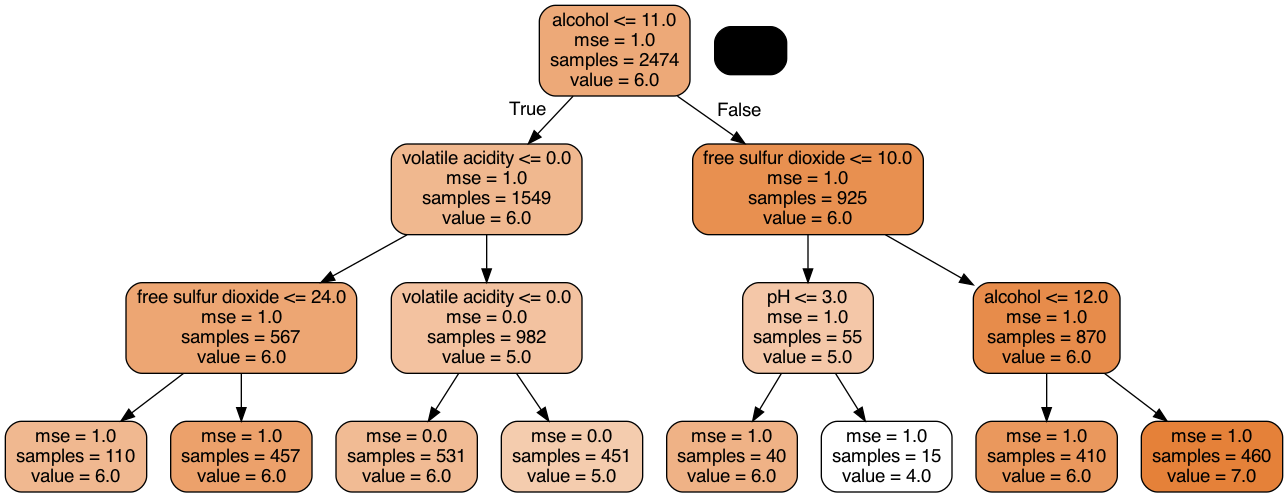

### XGBoost
*By Yasmeen Nahas*

In order to take class imbalance into account, I implemented an algorithm to balance the class weights of the individual classes within the XGBoost model. I then created a base model to assess the performance of a base XGBoost model with the data. In order to ensure that the model knew that this was a multiclassification problem, I the following hyperparameters from the start: `objective` = 'multi:softmax', `num_class`=7, and `eval_metric` = f1_score. The initial F1-score of the model was 64.3%. 

Due to the computational expensiveness of tuning the XGBoost model, I decided to test values of each hyperparameter seperately within the base model. I then graphed the cross-validated F1-score to determine the optimal ranges/values for the hyperparameter. This was often followed by a more narrow search of the specific hyperparamet to find the optimal values. I added each hyperparameter to the base model seperately, and with the optimal values found, performed a grid search over the optimal values of the hyperparameters.

The hyperparameters I individually graphed and considered (each in addition to the base model) are as followsgraphed individually to consider, along with the ranges I considered, are as follows:

#### 1. `n_estimators` (2 seperate rounds)
This controls the number of boosting stages done in the model.
1. First round: [5, 10, 50, 100, 500, 1000, 2000, 5000]
2. Second round: [60,  80,  100, 150, 200]

Ideal value: [150]

#### 2. `max_depth` (2 seperate rounds)
Max depth is used to control how many layers there are to the tree. It helps avoid overfitting by having too deep or a tree and underfitting by having too shallow of a tree.
1. First round: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
2. Second round: [6, 7, 8, 9, 10]

Ideal values: [7, 9, 10].

#### 3. `learning_rate` (2 seperate rounds)
Increasing learning rate will make the model learn the response faster.
1. First round: [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1.0]
2. Second round: [0.1, 0.15, 0.2, 0.25,0.3, 0.35, 0.4]

Ideal values: [0.2, 0.3, 0.35]

#### 4. `reg_lambda` (2 seperate rounds)
L2 regularization, similar to ridge regression. Increase value will make model more conservative.
1. First round: [0,0.5,1.0,1.5,2,10,100, 500, 1000]
2. Second round: [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 5.0, 10]

Ideal values: [1.0, 2.5, 3.0]

#### 5. `gamma` (4 seperate rounds)
Specifies the minimum values of the loss reduction (by the loss function) required to make a split. It makes the algorithm more conservative and avoids overfitting.
1. First round: [0,10,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9]
2. Second round: [0, 1, 2, 3, 4, 5]
3. Third round: [0, 0.1, 0.2, 0.3, 0.4, 0.5]
4. Fourth round: [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

Ideal values: [0, 0.04, 0.06, 0.07]

#### 6. `subsample` (2 seperate rounds)
Denotes the fraction of observations to be random samples for each tree. Lower values prevent overfitting by making the more conservative, but too small values may lead to underfitting.
1. First round: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
2. Second round: [0.7, 0.75, 0.8, 0.85, 0.9]

Ideal values: [0.75, 0.8, 0.85]

I then did a grid search with these ideal values. The parameters for the grid search were:

In [2]:
param_grid = {'n_estimators':[150],
              'max_depth': [7, 9, 10],
              'learning_rate': [0.2, 0.3, 0.35],
              'gamma': [0, 0.04, 0.06, 0.07],
              'reg_lambda':[1.0, 2.5, 3.0],
              'subsample': [0.75, 0.8, 0.85]}

Through the results of grid search, along with further tuning, I found the optimal hyperparameters to be: `gamma` = 0.06, `earning_rate` = 0.3, `max_depth` = 9, `n_estimators` = 150, `reg_lambda` = 1.0, and `subsample` = 0.8.

## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

A hard voting was model was used to ensemble the models. We chose to use hard voting over soft voting since the classifiers are not well-calibrated (i.e. they do not have probabilities at the same scale).

We ensembled our individual models (decision tree, bagged trees, random forest, and XGBoost) directly. Since all of our models were tree-based, we added a logistic regression model to our voting ensemble in order to decorrelated our predictions. Adding the logistic regression model was beneficial in improving the performance of our voting ensemble model. The result of the five-model voting ensemble is: 

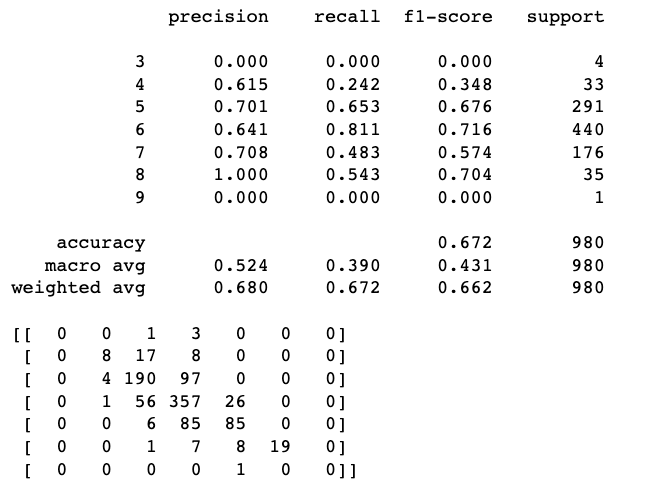

The (F1-score) accuracy of this model is 67.2%.

### Stacking ensemble

Similar to the voting ensemble model, we added a logistic regression model to our stacking ensemble model in order to decorrelate the trees. However, this worsened the performance of our stacking ensemble model. Therefore, we only ensembled our four individual model (decision tree, bagged trees, random forest, and XGBoost) directly. The result of our four-model stacking ensemble is:

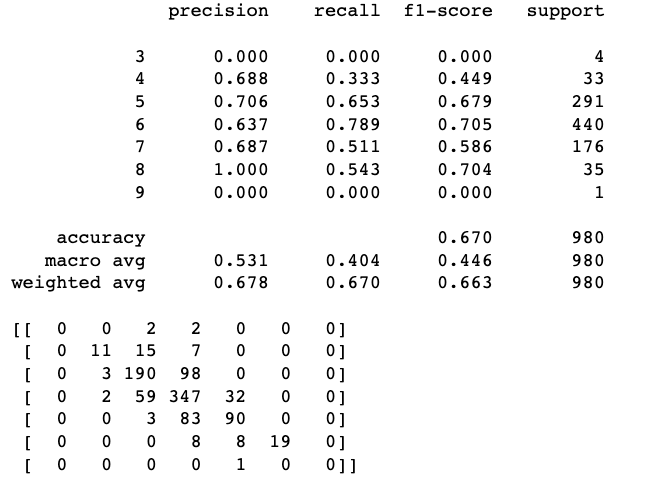

The (F1-score) accuracy of this model is 67%.

### Ensemble of ensembled models

We ensembled our voting ensemble model and stacking ensemble model together through a stacking ensemble to create an ensemble of ensemble models. The results of this model are:

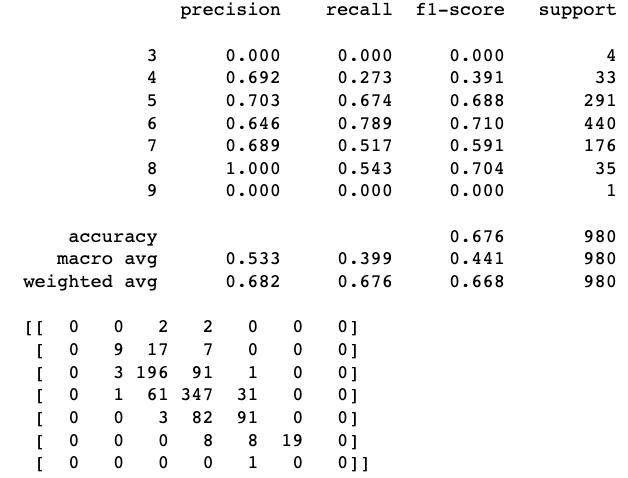

Therefore, our final model has an (F1-score) accuracy of 67.6%. We see that most misclassification is happening for the classes with very few instances (3 and 9), but the model performs fairly well for classes in the middle.

## Limitations of the model with regard to prediction

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

One of the limitations of our project is the lower F1-score we achieved for each of the models that was developed. This is probably due to the lack of balance amongst the different classes. If there was a better distribution of data of wine of different quality, I believe our models would have performed better. The data set was convenient enough (in terms of size) to tune each of the models to our best capacity.

It would not be inconvenient for the stakeholder to collect new data (as long as the data is freely available), since wine tasting and quality rating occur all the time, and the chemical information of the wine should be available if requested by the wine makers. The difficulty would be dependent on whether the wine tasters are open to sharing their scores and the wine manufacturers are open to sharing their chemical wine properties. It might be that some wines do not collect these properties, however, it would not be difficult to conduct a series of chemical tests to get the results. This would require buying the wine and the equipment to conduct the chemical tests, which might also have financial barriers. While the data is not impossible to retrieve after the model’s training, there might be some difficulties relating to cost. Moreover, the wine industry is much more niche, and collecting the data would probably be more difficult than collecting daily weather data, and so the dataset to test the model on might be smaller.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Utilizing the F1-score as our key metric, based on how it balances precision and recall on the positive class and usually performs better for data with an unbalanced class distribution, the model performs best for classes 4,5,6,7, and 8, and the imbalance of our data makes our model unreliable for other classes. 

Our model could therefore be useful to stakeholders in differentiating wine in the middle of the quality spectrum and distinguishing lower quality (5 and below) vs. higher quality (above 5) wines. Specifically, winemakers could use our model to assess the quality of their products without relying upon a wine taster's opinion, leading to more speed, efficiency, and accuracy when pricing wine and adjusting their offerings. Sommeliers in training could use the model to verify their assessments of lower vs. higher quality wines, particularly when differentiating between the middle classes of 4, 5, 6, 7, and 8. Wine enthusiasts and casual wine drinkers could use the model to distinguish the difference in quality of wines in the middle of the quality spectrum and to better decide which wines to purchase. 

We recognize that the class imbalance heavily affected our model's prediction ability, and thus our recommendations may not be practically implementable. Therefore, we suggest additional data, particularly data about wines of poor quality (1, 2, and 3 ratings) and wines of great quality (9 and 10 ratings). This additional data will help reduce the class imbalance in the data and will likely improve our model's prediction ability for all classes. Furthermore, one may want to consider approaching this analysis as a binary classification problem, in which wines are assigned low quality (if they have a rating of 1-5) or a high quality (if they have a rating of 6-10). This may will alleviate the issues of class imbalance in multiclass classification.

As mentioned, a limitation of our model is its ability to predict the quality of wines whose qualities have fewer instances (a really poor wine or a near-perfect wine is rare, so there exists little data about the physicochemical properties of these wines). Another limitation of our model is that we did not perform variable selection, so information regarding the 11 physicochemical properties is likely needed in order to accurately classify the model. Since our model is not computationally-expensive, our model could be updated and re-tuned at a certain frequency if new data arises. Our model could likely be used in the future as long as wines continue to possess the physicochemical properties from which our analysis and model is based.

Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Aarti Pappu</td>
    <td>Decision Tree</td>
    <td>Ensembling</td>    
    <td>Voting ensemble, stacking enesemble, ensemble of ensemble models</td>
  </tr>
  <tr>
    <td>Divya Bhardwaj</td>
    <td>Bagged Trees</td> 
    <td></td>    
    <td></td>
  </tr>
    <tr>
    <td>Diego Schummer</td>
    <td>Random Forest</td>
    <td>Data Quality Check/Preparation</td>    
    <td>Stratified Split and Feature Scaling</td>
  </tr>
    <tr>
    <td>Yasmeen Nahas</td>
    <td>XGBoost</td>
    <td>EDA</td>    
    <td>Visualized data</td> 
  </tr>
</table>

## Appendix {-}

### 1. Further Data Quality Check / Cleaning / Preparation

#### A. Distribution of Values of Each Variable Used in the Analysis

In [27]:
#| echo: false
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### B. Incorrect Values

In [28]:
#| echo: false
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


#### C. Missing Values

In [30]:
#| echo: false
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### D. Data Preparation - The Results of Stratification on Distribution of Response in Test & Train Sets vs Whole Dataset

In [34]:
#| echo: false
print("Whole dataset:\n", df.quality.value_counts(normalize=True))
print("\nTraining set:\n", y_train.value_counts(normalize=True))
print("\nTest set:\n", y_test.value_counts(normalize=True))

Whole dataset:
 6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64

Training set:
 quality
6          0.448698
5          0.297601
7          0.179684
8          0.035733
4          0.033180
3          0.004084
9          0.001021
dtype: float64

Test set:
 quality
6          0.448980
5          0.296939
7          0.179592
8          0.035714
4          0.033673
3          0.004082
9          0.001020
dtype: float64


### 2. Further EDA

#### A. Identification of outliers

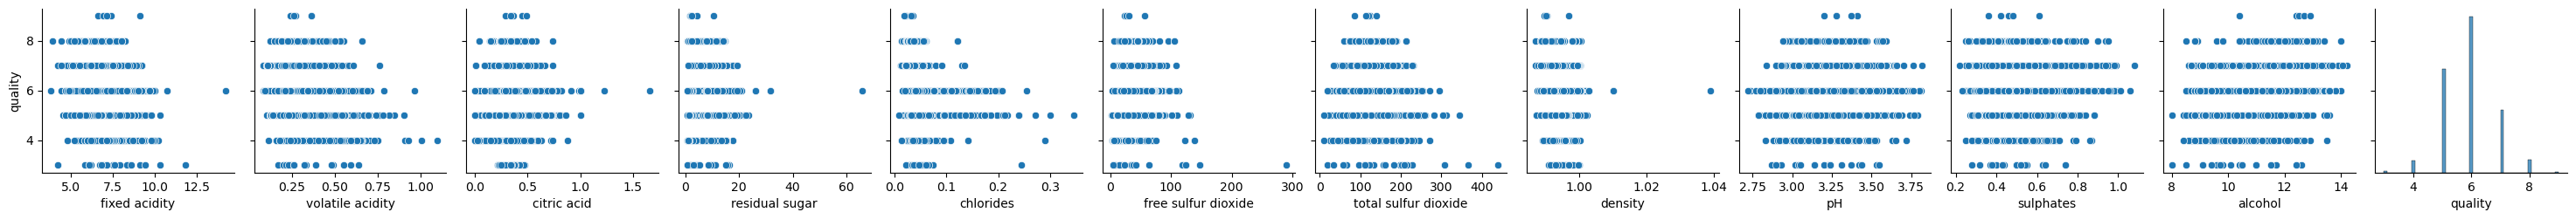

In [14]:
#| echo: false
sns.pairplot(df, y_vars=['quality'])

**Insights:**
1. We can see some outliers in the residual response, citric acid, density, and fixed acidity (against quality) plots. Further investigation revealed that these outliers did not stem from a single point (so its not a single faulty observation). Furthermore, it should not be an issue with tree-based models.

#### B. Distribution of the variables for individual predictors

/Users/aartipappu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


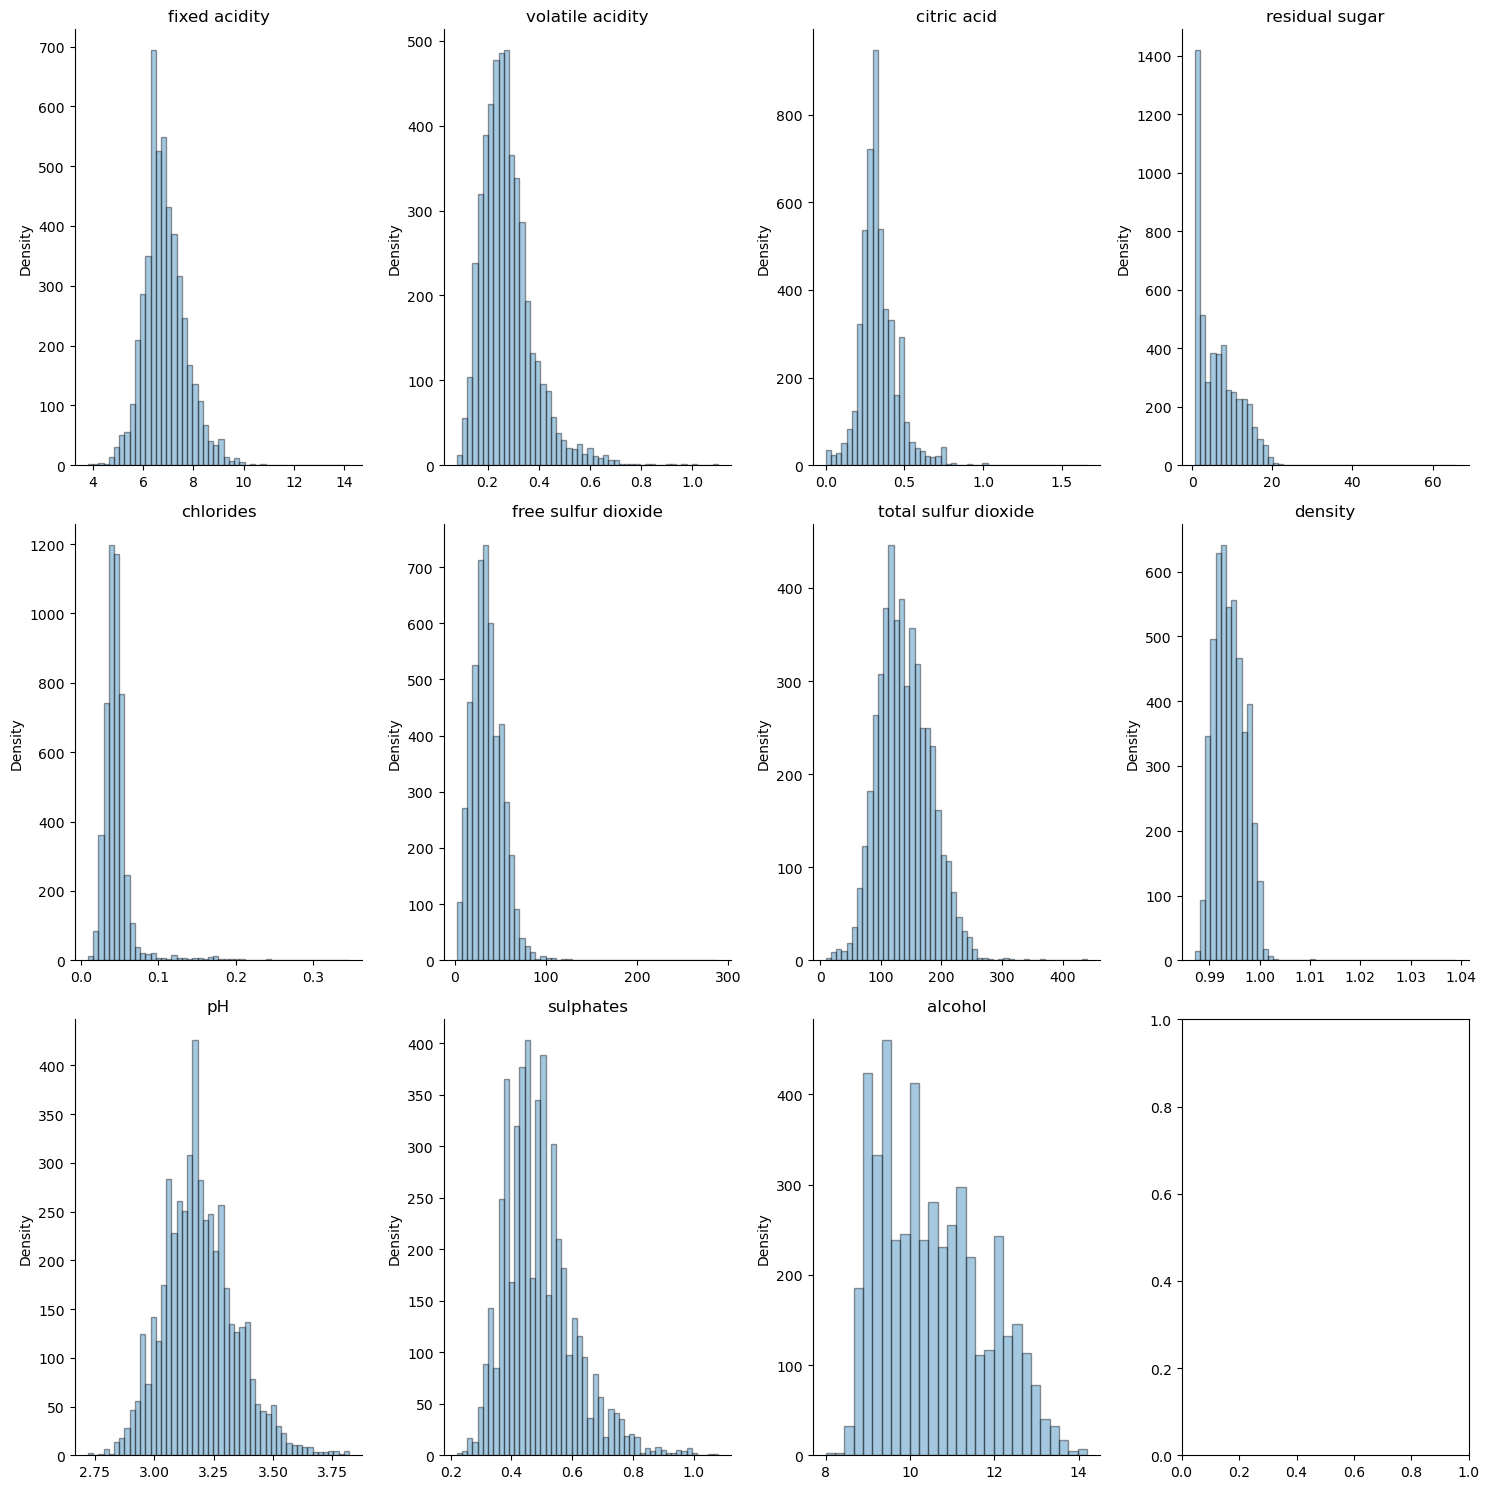

In [15]:
#| echo: false

selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Calculate the number of rows and columns based on the total number of features
num_features = len(selected_features)
num_rows = int(num_features ** 0.5)
num_cols = (num_features + num_rows - 1) // num_rows

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over the selected features and plot each density plot on a different subplot
for i, feature in enumerate(selected_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    sns.distplot(df[feature], ax=ax, kde=False, hist_kws={'edgecolor': 'black'})
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Density')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

plt.tight_layout()
plt.show()

**Insights:**
1. May be outliers in the citric acid, density, and fixed acidity (against quality) plots. Will not be an issue with tree-based models.